In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import pymfit 

# Mask making
- `pymfit` can generate object masks using `sep` and the `hscPipe` masks (if the lsst stack is installed)

In [2]:
img_fn = '../data/test-galaxy-2.fits'
mask_fn = '../local_data/mask.fits'

mask_kws = dict(out_fn=mask_fn, thresh=1.2, kern_sig=1.0, backsize=10, 
                obj_rmin=5, grow_sig=3.0, use_hsc_mask=False)
final_mask = pymfit.make_mask(img_fn, **mask_kws)

Let's look at the final mask:

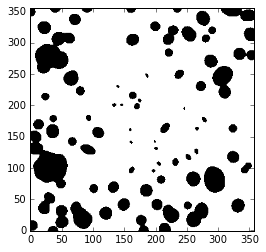

In [3]:
plt.imshow(final_mask, origin='lower', cmap='gray_r');

# Running `imfit`
- We only need the mask file name to run `imfit`, so if you already have a mask, you can skip the above step.


In [4]:
# intial params that are different from defaults.
# syntax is {parameter: [value, low, high]}
init_params = dict(PA=[20, 0, 360], n=[1.0, 0.01, 5.0]) 

# create a config dictionary
config = pymfit.sersic_config(init_params, img_shape=img_fn)

# run imfit
# note that the image file is a multi-extension cube, which explains the '[#]' additions
# also note that this config will be written to config_fn. if you already have a 
# config file written, then use config=None (default) and skip the above step. 
sersic = pymfit.run(img_fn+'[1]', config_fn='../local_data/config.txt', 
                    mask_fn=mask_fn, config=config, var_fn=img_fn+'[3]', 
                    out_fn='../local_data/best-fit.dat')

This returns a dictionary of the best-fit parameters:

In [5]:
sersic

{'I_e': 0.0392219,
 'I_e_err': 0.00170314,
 'PA': 247.056,
 'PA_err': 2.46323,
 'X0': 180.7333,
 'X0_err': 0.357,
 'Y0': 178.5299,
 'Y0_err': 0.2885,
 'ell': 0.2704,
 'ell_err': 0.0200722,
 'n': 0.995999,
 'n_err': 0.0387696,
 'r_e': 37.2345,
 'r_e_err': 1.05597,
 'reduced_chisq': 0.965097}

We can convert this into a `pymfit.Sersic` object for convenience:

In [6]:
sersic = pymfit.Sersic(sersic)

This calculates a bunch of useful params and has a useful `array` method:

mu_0 = 24.83 mag/arcsec^2, m_tot = 20.31 mag


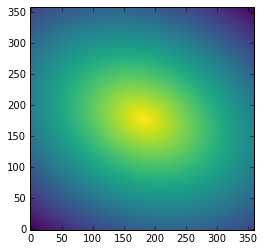

In [7]:
print('mu_0 = {:.2f} mag/arcsec^2, m_tot = {:.2f} mag'.format(sersic.mu_0, sersic.m_tot))
plt.imshow(sersic.array((360, 360), logscale=True), origin='lower', cmap='viridis');

# Visualize results
- Write quick visualization functions in `pymfit.viz`

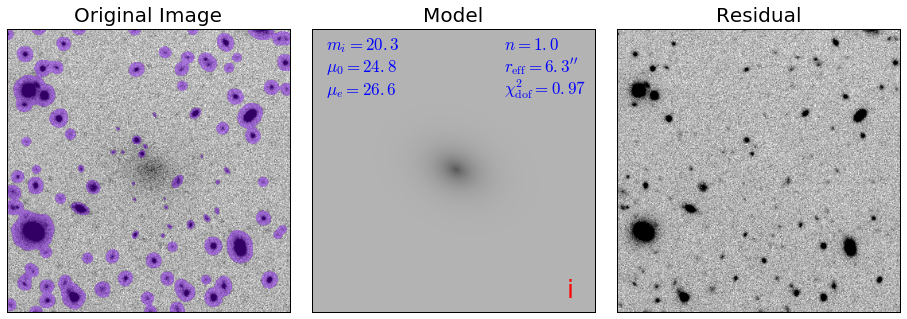

In [8]:
pymfit.viz.img_mod_res(img_fn, sersic.params, mask_fn, figsize=(16, 6), band='i')

# Tasks
- Write tasks in `pymfit.tasks` to streamline your code

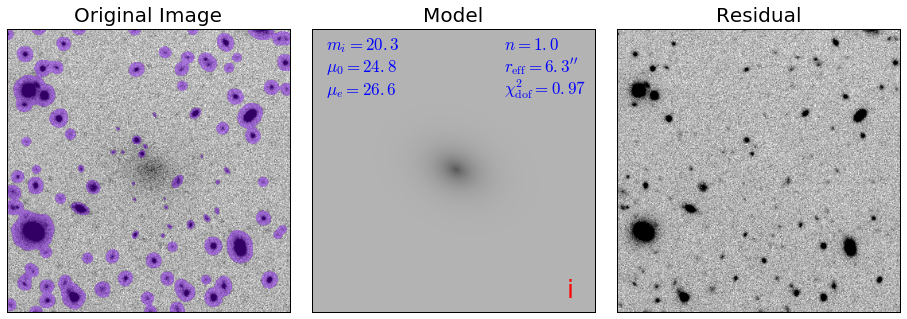

In [9]:
mask_kws = dict(thresh=1.2, kern_sig=1.0, backsize=10, 
                obj_rmin=5, grow_sig=3.0, use_hsc_mask=False)
run_kws = dict() # can pass pymfit.run kwargs with this
sersic = pymfit.tasks.sersic_fit(img_fn, init_params=init_params, mask_kws=mask_kws, 
                                 visualize=True, prefix='../local_data/best-fit-',
                                 run_kws=run_kws)